In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('penguins')
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)
especies = dfcopia['species'].unique()
print(especies)

dfcopia['specie numerica'] = 0

i = 0
for pinguin in dfcopia['species']:
    #print(pinguin)
    if pinguin == 'Adelie':
        dfcopia['specie numerica'].iloc[i] = 1
        i += 1
    elif pinguin == 'Chinstrap':
        dfcopia['specie numerica'].iloc[i] = 2
        i += 1
    elif pinguin == 'Gentoo':
        dfcopia['specie numerica'].iloc[i] = 3
        i += 1
    #print(dfcopia['species'].iloc[i-1],dfcopia['specie numerica'].iloc[i-1])

features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

['Adelie' 'Chinstrap' 'Gentoo']


c:\venv\ilumpy\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [3]:
# Normalizando os dados
sc = StandardScaler()
sc.fit(df_numericos)
X_norm = sc.transform(df_numericos)

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

In [5]:
from sklearn.ensemble import IsolationForest

SEMENTE_ALEATORIA = 61455
CORES = np.array(["red", "blue"])
COM_BORDA_DE_PREVISAO = True # mude para True para ver a borda de previsão

# aqui que criamos o modelo de Isolation Forest
modelo_if = IsolationForest(
    random_state=SEMENTE_ALEATORIA,
)

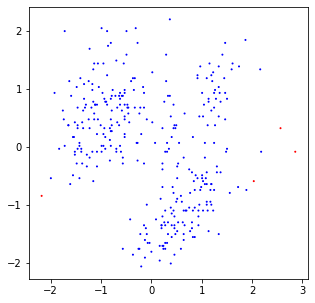

In [8]:
FRACAO_OUTLIERS = 0.01

CORES = np.array(["red", "blue"])

modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_if.fit(X_norm)
previsao = modelo_if.predict(X_norm)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_norm[:, 0],
    X_norm[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

plt.show()

### Considerando a redução de dimensionalidade:

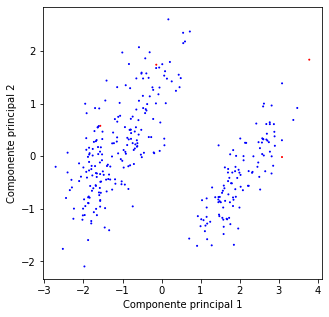

In [9]:
FRACAO_OUTLIERS = 0.01

CORES = np.array(["red", "blue"])

modelo_if = IsolationForest(
    contamination=FRACAO_OUTLIERS,
    random_state=SEMENTE_ALEATORIA,
)

# Ajustamos o modelo aos dados e realizamos a previsão
modelo_if.fit(X_pca)
previsao = modelo_if.predict(X_pca)

fig, eixo = plt.subplots(figsize=(5, 5))

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=1,
    color=CORES[(previsao + 1) // 2],
)

eixo.set_xlabel("Componente principal 1")
eixo.set_ylabel("Componente principal 2")
plt.show()

Em ambos os casos, é possível visualizar poucos outliers.